In [1]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [2]:
m = symbols('m') # mass
l = symbols('l') #length of arm
g = symbols('g') #gravity
t = symbols('t') # time
Jx = symbols('Jx') # Moment of Inertia X-component
Jy = symbols('Jy') # Moment of Inertia Y-component
Jz = symbols('Jz') # Moment of Inertia Z-component

Fg = Matrix([0,0,-m*9.81])

p_x, p_y, p_z = symbols('p_x, p_y, p_z') # components of position 
psi, theta, phi = symbols('psi, theta, phi') # yaw, pitch and roll 
v_x, v_y, v_z = symbols('v_x, v_y, v_z') # components of linear velocity
w_x, w_y, w_z = symbols('w_x, w_y, w_z') # components of angular velocity 

v_in_body = Matrix([v_x, v_y, v_z])
w_in_body = Matrix([w_x, w_y, w_z])

Rz = Matrix([[cos(psi), -sin(psi), 0], [sin(psi), cos(psi), 0], [0, 0, 1]])
Ry = Matrix([[cos(theta), 0, sin(theta)], [0, 1, 0], [-sin(theta), 0, cos(theta)]])
Rx = Matrix([[1, 0, 0], [0, cos(phi), -sin(phi)], [0, sin(phi), cos(phi)]])
R_body_in_world = Rz @ Ry @ Rx


R_body_in_world

Matrix([
[cos(psi)*cos(theta), sin(phi)*sin(theta)*cos(psi) - sin(psi)*cos(phi),  sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi)],
[sin(psi)*cos(theta), sin(phi)*sin(psi)*sin(theta) + cos(phi)*cos(psi), -sin(phi)*cos(psi) + sin(psi)*sin(theta)*cos(phi)],
[        -sin(theta),                              sin(phi)*cos(theta),                               cos(phi)*cos(theta)]])

In [3]:
ex = Matrix([[1], [0], [0]])
ey = Matrix([[0], [1], [0]])
ez = Matrix([[0], [0], [1]])
M = simplify(Matrix.hstack((Ry @ Rx).T @ ez, Rx.T @ ey, ex).inv(), full=True)

f1, f2, f3, f4 = symbols("f1, f2, f3, f4")
T1, T2, T3, T4 = symbols("T1, T2, T3, T4")

F1 = Matrix([0,0,f1]) # force from +x rotor
F2 = Matrix([0,0,f2]) # force from +y rotor
F3 = Matrix([0,0,f3]) # force from -x rotor 
F4 = Matrix([0,0,f4]) # force from -y rotor

F_total = F1 + F2 + F3 + F4

F_total

Matrix([
[                0],
[                0],
[f1 + f2 + f3 + f4]])

In [4]:
T1_moment = Matrix([0,0,T1]) # moment from +x rotor
T2_moment = Matrix([0,0,T2]) # moment from +y rotor
T3_moment = Matrix([0,0,T3]) # moment from -x rotor 
T4_moment = Matrix([0,0,T4]) # moment from -y rotor

R1 = Matrix([l,0,0]) # position of +x rotor
R2 = Matrix([0,l,0]) # position of +y rotor
R3 = Matrix([-l,0,0]) # position of -x rotor
R4 = Matrix([0,-l,0]) # position of -y rotor

T1_Torque = R1.cross(F1)
T2_Torque = R2.cross(F2)
T3_Torque = R3.cross(F3)
T4_Torque = R4.cross(F4)


Moment_of_Inertia = Matrix([[Jx,   0,   0],
                            [  0, Jy,   0],
                            [  0,   0, Jz]])



R_body_in_world.T @ Fg

Matrix([
[          9.81*m*sin(theta)],
[-9.81*m*sin(phi)*cos(theta)],
[-9.81*m*cos(phi)*cos(theta)]])

In [5]:
Force_Body = (R_body_in_world.T @ Fg) + F_total
Torque = (T1_moment + T2_moment + T3_moment + T4_moment + T1_Torque + T2_Torque + T3_Torque + T4_Torque)

EoM = Matrix.vstack(
    R_body_in_world @ v_in_body,
    M @ w_in_body,
    (1 / m) * (Force_Body - w_in_body.cross(m * v_in_body)),
    Moment_of_Inertia.inv() @ (Torque - w_in_body.cross(Moment_of_Inertia @ w_in_body)),
)

EoM = simplify(EoM, full=True) 
EoM

Matrix([
[v_x*cos(psi)*cos(theta) + v_y*(sin(phi)*sin(theta)*cos(psi) - sin(psi)*cos(phi)) + v_z*(sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi))],
[v_x*sin(psi)*cos(theta) + v_y*(sin(phi)*sin(psi)*sin(theta) + cos(phi)*cos(psi)) - v_z*(sin(phi)*cos(psi) - sin(psi)*sin(theta)*cos(phi))],
[                                                                      -v_x*sin(theta) + v_y*sin(phi)*cos(theta) + v_z*cos(phi)*cos(theta)],
[                                                                                                 (w_y*sin(phi) + w_z*cos(phi))/cos(theta)],
[                                                                                                              w_y*cos(phi) - w_z*sin(phi)],
[                                                                                  w_x + w_y*sin(phi)*tan(theta) + w_z*cos(phi)*tan(theta)],
[                                                                                                      v_y*w_z - v_z*w_y + 9.81*sin(theta)],
[   

In [6]:
#Test Case 3: Complex

total_time = 0
#Action 1: Launch
#initial conditions


J_x = 0.0032135
J_y = 0.0032135
J_z = 0.00248433


px0 = 0
py0 = 0
pz0 = 0
vx0 = 0
vy0 = 0
vz0 = 0
psi0 = 0
theta0 = 0
phi0 = 0
wx0 = 0
wy0 = 0
wz0 = 0

b1 = 1.140*10**(-7)
k1 = 2.980*10**(-6)
mass = 1.6

delta_a = 1
lift = mass*(9.81 + delta_a)


EoM_complex1_history = []


timestep = 0.01

t = 0


arm_length = 0.150
center_width = 0.08

l1 = arm_length + np.sqrt(2*(center_width/2)**2)



w1_complex1, w2_complex1, w3_complex1, w4_complex1 = symbols('w1_complex1, w2_complex1, w3_complex1, w4_complex1')


f_z_eq = Eq(k1 *(w1_complex1**2 + w2_complex1**2 + w3_complex1**2 + w4_complex1**2),lift)
T_x_eq = Eq(k1 * l1 * (-w2_complex1**2 + w4_complex1**2),0)
T_y_eq = Eq(k1 * l1 * (-w1_complex1**2 + w3_complex1**2),0)
T_z_eq = Eq(b1 * (-w1_complex1**2 + w2_complex1**2 - w3_complex1**2 + w4_complex1**2),0)


solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex1, w2_complex1, w3_complex1, w4_complex1))

[(-1204.57739950964, -1204.57739950964, -1204.57739950964, -1204.57739950964),
 (-1204.57739950964, -1204.57739950964, -1204.57739950964, 1204.57739950964),
 (-1204.57739950964, -1204.57739950964, 1204.57739950964, -1204.57739950964),
 (-1204.57739950964, -1204.57739950964, 1204.57739950964, 1204.57739950964),
 (-1204.57739950964, 1204.57739950964, -1204.57739950964, -1204.57739950964),
 (-1204.57739950964, 1204.57739950964, -1204.57739950964, 1204.57739950964),
 (-1204.57739950964, 1204.57739950964, 1204.57739950964, -1204.57739950964),
 (-1204.57739950964, 1204.57739950964, 1204.57739950964, 1204.57739950964),
 (1204.57739950964, -1204.57739950964, -1204.57739950964, -1204.57739950964),
 (1204.57739950964, -1204.57739950964, -1204.57739950964, 1204.57739950964),
 (1204.57739950964, -1204.57739950964, 1204.57739950964, -1204.57739950964),
 (1204.57739950964, -1204.57739950964, 1204.57739950964, 1204.57739950964),
 (1204.57739950964, 1204.57739950964, -1204.57739950964, -1204.577399509

In [7]:

#speeds for launch
w1c1 = 1204.57739950964
w2c1 = 1204.57739950964
w3c1 = 1204.57739950964
w4c1 = 1204.57739950964



f1_complex1 = k1 * w1c1**2
f2_complex1 = k1 * w2c1**2
f3_complex1 = k1 * w3c1**2
f4_complex1 = k1 * w4c1**2

T1_complex1 = -b1 * w1c1**2
T2_complex1 = b1 * w2c1**2
T3_complex1 = -b1 * w3c1**2
T4_complex1 = b1 * w4c1**2




In [8]:
EoM_complex1 = EoM.subs({f1:f1_complex1,f2:f2_complex1,f3:f3_complex1,f4:f4_complex1,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex1,T2:T2_complex1,T3:T3_complex1,T4:T4_complex1})
display(EoM_complex1)
EoM_complex1_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex1, "numpy")

print(np.array([px0,py0,pz0,psi0,theta0,phi0,vx0,vy0,vz0,wx0,wy0,wz0]))


Matrix([
[v_x*cos(psi)*cos(theta) + v_y*(sin(phi)*sin(theta)*cos(psi) - sin(psi)*cos(phi)) + v_z*(sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi))],
[v_x*sin(psi)*cos(theta) + v_y*(sin(phi)*sin(psi)*sin(theta) + cos(phi)*cos(psi)) - v_z*(sin(phi)*cos(psi) - sin(psi)*sin(theta)*cos(phi))],
[                                                                      -v_x*sin(theta) + v_y*sin(phi)*cos(theta) + v_z*cos(phi)*cos(theta)],
[                                                                                                 (w_y*sin(phi) + w_z*cos(phi))/cos(theta)],
[                                                                                                              w_y*cos(phi) - w_z*sin(phi)],
[                                                                                  w_x + w_y*sin(phi)*tan(theta) + w_z*cos(phi)*tan(theta)],
[                                                                                                      v_y*w_z - v_z*w_y + 9.81*sin(theta)],
[   

[0 0 0 0 0 0 0 0 0 0 0 0]


In [9]:
EoM_complex1 = EoM.subs({f1:f1_complex1,f2:f2_complex1,f3:f3_complex1,f4:f4_complex1,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex1,T2:T2_complex1,T3:T3_complex1,T4:T4_complex1})
display(EoM_complex1)
EoM_complex1_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex1, "numpy")

print(np.array([px0,py0,pz0,psi0,theta0,phi0,vx0,vy0,vz0,wx0,wy0,wz0]))


Matrix([
[v_x*cos(psi)*cos(theta) + v_y*(sin(phi)*sin(theta)*cos(psi) - sin(psi)*cos(phi)) + v_z*(sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi))],
[v_x*sin(psi)*cos(theta) + v_y*(sin(phi)*sin(psi)*sin(theta) + cos(phi)*cos(psi)) - v_z*(sin(phi)*cos(psi) - sin(psi)*sin(theta)*cos(phi))],
[                                                                      -v_x*sin(theta) + v_y*sin(phi)*cos(theta) + v_z*cos(phi)*cos(theta)],
[                                                                                                 (w_y*sin(phi) + w_z*cos(phi))/cos(theta)],
[                                                                                                              w_y*cos(phi) - w_z*sin(phi)],
[                                                                                  w_x + w_y*sin(phi)*tan(theta) + w_z*cos(phi)*tan(theta)],
[                                                                                                      v_y*w_z - v_z*w_y + 9.81*sin(theta)],
[   

[0 0 0 0 0 0 0 0 0 0 0 0]


In [10]:
#EoM_complex1_history.clear()
EoM_complex1_history.append(np.array([px0,py0,pz0,psi0,theta0,phi0,vx0,vy0,vz0,wx0,wy0,wz0]))
t = 0

In [11]:
while (t < 1):
    dEoM = EoM_complex1_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    #print('\n')
    EoM_complex1_history.append(newEoM)
    t = timestep + t
    total_time = total_time+timestep
    #print(t)
    


In [12]:
#Action 2: decelerate from launch
delta_a = -1
lift = mass*(9.81 + delta_a)


#EoM_complex1_history = []


timestep = 0.01

t = 0


arm_length = 0.150
center_width = 0.08

l1 = arm_length + np.sqrt(2*(center_width/2)**2)



w1_complex2, w2_complex2, w3_complex2, w4_complex2 = symbols('w1_complex2, w2_complex2, w3_complex2, w4_complex2')


f_z_eq = Eq(k1 *(w1_complex2**2 + w2_complex2**2 + w3_complex2**2 + w4_complex2**2),lift)
T_x_eq = Eq(k1 * l1 * (-w2_complex2**2 + w4_complex2**2),0)
T_y_eq = Eq(k1 * l1 * (-w1_complex2**2 + w3_complex2**2),0)
T_z_eq = Eq(b1 * (-w1_complex2**2 + w2_complex2**2 - w3_complex2**2 + w4_complex2**2),0)


solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex2, w2_complex2, w3_complex2, w4_complex2))


[(-1087.45130262025, -1087.45130262025, -1087.45130262025, -1087.45130262025),
 (-1087.45130262025, -1087.45130262025, -1087.45130262025, 1087.45130262025),
 (-1087.45130262025, -1087.45130262025, 1087.45130262025, -1087.45130262025),
 (-1087.45130262025, -1087.45130262025, 1087.45130262025, 1087.45130262025),
 (-1087.45130262025, 1087.45130262025, -1087.45130262025, -1087.45130262025),
 (-1087.45130262025, 1087.45130262025, -1087.45130262025, 1087.45130262025),
 (-1087.45130262025, 1087.45130262025, 1087.45130262025, -1087.45130262025),
 (-1087.45130262025, 1087.45130262025, 1087.45130262025, 1087.45130262025),
 (1087.45130262025, -1087.45130262025, -1087.45130262025, -1087.45130262025),
 (1087.45130262025, -1087.45130262025, -1087.45130262025, 1087.45130262025),
 (1087.45130262025, -1087.45130262025, 1087.45130262025, -1087.45130262025),
 (1087.45130262025, -1087.45130262025, 1087.45130262025, 1087.45130262025),
 (1087.45130262025, 1087.45130262025, -1087.45130262025, -1087.451302620

In [13]:
#speeds for decelerate
w1c2 = 1087.45130262025
w2c2 = 1087.45130262025
w3c2 = 1087.45130262025
w4c2 = 1087.45130262025



f1_complex2 = k1 * w1c2**2
f2_complex2 = k1 * w2c2**2
f3_complex2 = k1 * w3c2**2
f4_complex2 = k1 * w4c2**2

T1_complex2 = -b1 * w1c2**2
T2_complex2 = b1 * w2c2**2
T3_complex2 = -b1 * w3c2**2
T4_complex2 = b1 * w4c2**2


In [14]:
EoM_complex2 = EoM.subs({f1:f1_complex2,f2:f2_complex2,f3:f3_complex2,f4:f4_complex2,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex2,T2:T2_complex2,T3:T3_complex2,T4:T4_complex2})
display(EoM_complex2)
EoM_complex2_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex2, "numpy")
t = 0

Matrix([
[v_x*cos(psi)*cos(theta) + v_y*(sin(phi)*sin(theta)*cos(psi) - sin(psi)*cos(phi)) + v_z*(sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi))],
[v_x*sin(psi)*cos(theta) + v_y*(sin(phi)*sin(psi)*sin(theta) + cos(phi)*cos(psi)) - v_z*(sin(phi)*cos(psi) - sin(psi)*sin(theta)*cos(phi))],
[                                                                      -v_x*sin(theta) + v_y*sin(phi)*cos(theta) + v_z*cos(phi)*cos(theta)],
[                                                                                                 (w_y*sin(phi) + w_z*cos(phi))/cos(theta)],
[                                                                                                              w_y*cos(phi) - w_z*sin(phi)],
[                                                                                  w_x + w_y*sin(phi)*tan(theta) + w_z*cos(phi)*tan(theta)],
[                                                                                                      v_y*w_z - v_z*w_y + 9.81*sin(theta)],
[   

In [15]:
while (t < 1):
    dEoM = EoM_complex2_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    #print('\n')
    EoM_complex1_history.append(newEoM)
    t = timestep + t
    total_time = total_time + timestep
    #print(t)
    


In [16]:
print(EoM_complex1_history[-1])

[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.67361738e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00]


In [17]:
#Action 3-5: Accelerate to 1 m/s
time_iter = 0.109
timestep = 0.01
t = 0
while t < time_iter:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    T_y_0 = 0.1 # positive torque to pitch down

    w1_complex3, w2_complex3, w3_complex3, w4_complex3 = symbols('w1_complex3, w2_complex3, w3_complex3, w4_complex3')

    f_z_eq = Eq(k1 *(w1_complex3**2 + w2_complex3**2 + w3_complex3**2 + w4_complex3**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex3**2 + w4_complex3**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex3**2 + w3_complex3**2),T_y_0)
    T_z_eq = Eq(b1 * (-w1_complex3**2 + w2_complex3**2 - w3_complex3**2 + w4_complex3**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex3, w2_complex3, w3_complex3, w4_complex3), dict = True)

    w1c3 = solution[-1][w1_complex3]
    w2c3 = solution[-1][w2_complex3]
    w3c3 = solution[-1][w3_complex3]
    w4c3 = solution[-1][w4_complex3]
    
    f1_complex3 = k1 * w1c3**2
    f2_complex3 = k1 * w2c3**2     
    f3_complex3 = k1 * w3c3**2
    f4_complex3 = k1 * w4c3**2

    T1_complex3 = -b1 * w1c3**2
    T2_complex3 = b1 * w2c3**2
    T3_complex3 = -b1 * w3c3**2
    T4_complex3 = b1 * w4c3**2

    EoM_complex3 = EoM.subs({f1:f1_complex3,f2:f2_complex3,f3:f3_complex3,f4:f4_complex3,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex3,T2:T2_complex3,T3:T3_complex3,T4:T4_complex3})
    EoM_complex3_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex3, "numpy")
    
    dEoM = EoM_complex3_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    t = t + timestep
    print(EoM_complex1_history[-1])
    #print(t)
    
    
print("Action complete")
    
    
while EoM_complex1_history[-1][10] > 0.1:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    T_y_0 = -0.1 #negative torque to slow pitch down

    w1_complex4, w2_complex4, w3_complex4, w4_complex4 = symbols('w1_complex4, w2_complex4, w3_complex4, w4_complex4')

    f_z_eq = Eq(k1 *(w1_complex4**2 + w2_complex4**2 + w3_complex4**2 + w4_complex4**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex4**2 + w4_complex4**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex4**2 + w3_complex4**2),T_y_0)
    T_z_eq = Eq(b1 * (-w1_complex4**2 + w2_complex4**2 - w3_complex4**2 + w4_complex4**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex4, w2_complex4, w3_complex4, w4_complex4), dict = True)

    w1c4 = solution[-1][w1_complex4]
    w2c4 = solution[-1][w2_complex4]
    w3c4 = solution[-1][w3_complex4]
    w4c4 = solution[-1][w4_complex4]
    
    f1_complex4 = k1 * w1c4**2
    f2_complex4 = k1 * w2c4**2     
    f3_complex4 = k1 * w3c4**2
    f4_complex4 = k1 * w4c4**2

    T1_complex4 = -b1 * w1c4**2
    T2_complex4 = b1 * w2c4**2
    T3_complex4 = -b1 * w3c4**2
    T4_complex4 = b1 * w4c4**2

    EoM_complex4 = EoM.subs({f1:f1_complex4,f2:f2_complex4,f3:f3_complex4,f4:f4_complex4,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex4,T2:T2_complex4,T3:T3_complex4,T4:T4_complex4})
    EoM_complex4_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex4, "numpy")
    
    dEoM = EoM_complex4_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    print(EoM_complex1_history[-1])
    #print(t)

print("Action complete")
    
while EoM_complex1_history[-1][10] > 0:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    T_y_0 = -0.05 #negative torque to stop pitch down

    w1_complex5, w2_complex5, w3_complex5, w4_complex5 = symbols('w1_complex5, w2_complex5, w3_complex5, w4_complex5')

    f_z_eq = Eq(k1 *(w1_complex5**2 + w2_complex5**2 + w3_complex5**2 + w4_complex5**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex5**2 + w4_complex5**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex5**2 + w3_complex5**2),T_y_0)
    T_z_eq = Eq(b1 * (-w1_complex5**2 + w2_complex5**2 - w3_complex5**2 + w4_complex5**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex5, w2_complex5, w3_complex5, w4_complex5), dict = True)

    w1c5 = solution[-1][w1_complex5]
    w2c5 = solution[-1][w2_complex5]
    w3c5 = solution[-1][w3_complex5]
    w4c5 = solution[-1][w4_complex5]
    
    f1_complex5 = k1 * w1c5**2
    f2_complex5 = k1 * w2c5**2     
    f3_complex5 = k1 * w3c5**2
    f4_complex5 = k1 * w4c5**2

    T1_complex5 = -b1 * w1c5**2
    T2_complex5 = b1 * w2c5**2
    T3_complex5 = -b1 * w3c5**2
    T4_complex5 = b1 * w4c5**2

    EoM_complex5 = EoM.subs({f1:f1_complex5,f2:f2_complex5,f3:f3_complex5,f4:f4_complex5,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex5,T2:T2_complex5,T3:T3_complex5,T4:T4_complex5})
    EoM_complex5_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex5, "numpy")
    
    dEoM = EoM_complex5_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    print(EoM_complex1_history[-1])
    #print(t)

print("Action complete")



[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.67361738e-17  0.00000000e+00  3.11187200e-01  0.00000000e+00]


[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  3.11190000e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.67361738e-17  0.00000000e+00  6.22374400e-01  0.00000000e+00]


[0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00 9.335600e-03
 0.000000e+00 3.053000e-04 0.000000e+00 9.000000e-07 0.000000e+00
 9.335616e-01 0.000000e+00]


[3.1000000e-06 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.8671200e-02
 0.0000000e+00 1.2211000e-03 0.0000000e+00 1.2300000e-05 0.0000000e+00
 1.2447488e+00 0.0000000e+00]


[1.530000e-05 0.000000e+00 9.999999e-01 0.000000e+00 3.111870e-02
 0.000000e+00 3.052500e-03 0.000000e+00 6.170000e-05 0.000000e+00
 1.555936e+00 0.000000e+00]


[4.5800000e-05 0.0000000e+00 9.9999960e-01 0.0000000e+00 4.6678100e-02
 0.0000000e+00 6.1038000e-03 0.00

In [18]:
#Action 6-8: Level Out
time_iter2 = 0.156
t = 0
while t < time_iter2:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    T_y_0 = -0.05 # negative torque to start pitch up

    w1_complex6, w2_complex6, w3_complex6, w4_complex6 = symbols('w1_complex6, w2_complex6, w3_complex6, w4_complex6')

    f_z_eq = Eq(k1 *(w1_complex6**2 + w2_complex6**2 + w3_complex6**2 + w4_complex6**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex6**2 + w4_complex6**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex6**2 + w3_complex6**2),T_y_0)
    T_z_eq = Eq(b1 * (-w1_complex6**2 + w2_complex6**2 - w3_complex6**2 + w4_complex6**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex6, w2_complex6, w3_complex6, w4_complex6), dict = True)

    w1c6 = solution[-1][w1_complex6]
    w2c6 = solution[-1][w2_complex6]
    w3c6 = solution[-1][w3_complex6]
    w4c6 = solution[-1][w4_complex6]
    
    f1_complex6 = k1 * w1c6**2
    f2_complex6 = k1 * w2c6**2     
    f3_complex6 = k1 * w3c6**2
    f4_complex6 = k1 * w4c6**2

    T1_complex6 = -b1 * w1c6**2
    T2_complex6 = b1 * w2c6**2
    T3_complex6 = -b1 * w3c6**2
    T4_complex6 = b1 * w4c6**2

    EoM_complex6 = EoM.subs({f1:f1_complex6,f2:f2_complex6,f3:f3_complex6,f4:f4_complex6,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex6,T2:T2_complex6,T3:T3_complex6,T4:T4_complex6})
    EoM_complex6_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex6, "numpy")
    
    dEoM = EoM_complex6_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    #print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    t = t + timestep
    print(EoM_complex1_history[-1])
    #print(t)
    
    
print("Action complete")

while EoM_complex1_history[-1][10] < -0.1:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    T_y_0 = 0.05 # positive torque to slow pitch up

    w1_complex7, w2_complex7, w3_complex7, w4_complex7 = symbols('w1_complex7, w2_complex7, w3_complex7, w4_complex7')

    f_z_eq = Eq(k1 *(w1_complex7**2 + w2_complex7**2 + w3_complex7**2 + w4_complex7**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex7**2 + w4_complex7**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex7**2 + w3_complex7**2),T_y_0)
    T_z_eq = Eq(b1 * (-w1_complex7**2 + w2_complex7**2 - w3_complex7**2 + w4_complex7**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex7, w2_complex7, w3_complex7, w4_complex7), dict = True)

    w1c7 = solution[-1][w1_complex7]
    w2c7 = solution[-1][w2_complex7]
    w3c7 = solution[-1][w3_complex7]
    w4c7 = solution[-1][w4_complex7]
    
    f1_complex7 = k1 * w1c7**2
    f2_complex7 = k1 * w2c7**2     
    f3_complex7 = k1 * w3c7**2
    f4_complex7 = k1 * w4c7**2

    T1_complex7 = -b1 * w1c7**2
    T2_complex7 = b1 * w2c7**2
    T3_complex7 = -b1 * w3c7**2
    T4_complex7 = b1 * w4c7**2

    EoM_complex7 = EoM.subs({f1:f1_complex7,f2:f2_complex7,f3:f3_complex7,f4:f4_complex7,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex7,T2:T2_complex7,T3:T3_complex7,T4:T4_complex7})
    EoM_complex7_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex7, "numpy")
    
    dEoM = EoM_complex7_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    #print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    print(EoM_complex1_history[-1])
    #print(t)

print("Action complete")

    
while EoM_complex1_history[-1][10] < 0:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    T_y_0 = 0.005 #positive torque to stop pitch up 

    w1_complex8, w2_complex8, w3_complex8, w4_complex8 = symbols('w1_complex8, w2_complex8, w3_complex8, w4_complex8')

    f_z_eq = Eq(k1 *(w1_complex8**2 + w2_complex8**2 + w3_complex8**2 + w4_complex8**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex8**2 + w4_complex8**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex8**2 + w3_complex8**2),T_y_0)
    T_z_eq = Eq(b1 * (-w1_complex8**2 + w2_complex8**2 - w3_complex8**2 + w4_complex8**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex8, w2_complex8, w3_complex8, w4_complex8), dict = True)

    w1c8 = solution[-1][w1_complex8]
    w2c8 = solution[-1][w2_complex8]
    w3c8 = solution[-1][w3_complex8]
    w4c8 = solution[-1][w4_complex8]
    
    f1_complex8 = k1 * w1c8**2
    f2_complex8 = k1 * w2c8**2     
    f3_complex8 = k1 * w3c8**2
    f4_complex8 = k1 * w4c8**2

    T1_complex8 = -b1 * w1c8**2
    T2_complex8 = b1 * w2c8**2
    T3_complex8 = -b1 * w3c8**2
    T4_complex8 = b1 * w4c8**2

    EoM_complex8 = EoM.subs({f1:f1_complex8,f2:f2_complex8,f3:f3_complex8,f4:f4_complex8,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex8,T2:T2_complex8,T3:T3_complex8,T4:T4_complex8})
    EoM_complex8_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex8, "numpy")
    
    dEoM = EoM_complex8_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    #print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    print(EoM_complex1_history[-1])
    #print(t)

print("Action complete")


[ 0.0245217  0.         0.9994488  0.         0.3765364  0.
  0.3927225  0.         0.1480843  0.        -0.1555936  0.       ]
[ 0.0287183  0.         0.9993819  0.         0.3749805  0.
  0.4290244  0.         0.161736   0.        -0.3111872  0.       ]
[ 0.0333028  0.         0.9993156  0.         0.3718686  0.
  0.4654573  0.         0.1745429  0.        -0.4667808  0.       ]
[ 0.0382734  0.         0.9992505  0.         0.3672008  0.
  0.5019173  0.         0.1862724  0.        -0.6223744  0.       ]
[ 0.0436267  0.         0.9991871  0.         0.3609771  0.
  0.5382949  0.         0.1966952  0.        -0.777968   0.       ]
[ 0.0493574  0.         0.9991261  0.         0.3531974  0.
  0.5744729  0.         0.2055876  0.        -0.9335616  0.       ]
[ 0.0554586  0.         0.999068   0.         0.3438618  0.
  0.6103249  0.         0.2127341  0.        -1.0891552  0.       ]
[ 0.0619217  0.         0.9990132  0.         0.3329702  0.
  0.6457139  0.         0.2179294  0.       

In [19]:
time_iter = 0.25
timestep = 0.01
t = 0
while t < time_iter:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    

    w1_complex9, w2_complex9, w3_complex9, w4_complex9 = symbols('w1_complex9, w2_complex9, w3_complex9, w4_complex9')

    f_z_eq = Eq(k1 *(w1_complex9**2 + w2_complex9**2 + w3_complex9**2 + w4_complex9**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex9**2 + w4_complex9**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex9**2 + w3_complex9**2),0)
    T_z_eq = Eq(b1 * (-w1_complex9**2 + w2_complex9**2 - w3_complex9**2 + w4_complex9**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex9, w2_complex9, w3_complex9, w4_complex9), dict = True)

    w1c9 = solution[-1][w1_complex9]
    w2c9 = solution[-1][w2_complex9]
    w3c9 = solution[-1][w3_complex9]
    w4c9 = solution[-1][w4_complex9]
    
    f1_complex9 = k1 * w1c9**2
    f2_complex9 = k1 * w2c9**2     
    f3_complex9 = k1 * w3c9**2
    f4_complex9 = k1 * w4c9**2

    T1_complex9 = -b1 * w1c9**2
    T2_complex9 = b1 * w2c9**2
    T3_complex9 = -b1 * w3c9**2
    T4_complex9 = b1 * w4c9**2

    EoM_complex9 = EoM.subs({f1:f1_complex9,f2:f2_complex9,f3:f3_complex9,f4:f4_complex9,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex9,T2:T2_complex9,T3:T3_complex9,T4:T4_complex9})
    EoM_complex9_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex9, "numpy")
    
    dEoM = EoM_complex9_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    t = t + timestep
    print(EoM_complex1_history[-1])
    #print(t)
    
    
print("Action complete")



[ 0.2919849  0.         0.9988042  0.        -0.0217832  0.
  0.997612   0.        -0.0209569  0.         0.         0.       ]


[ 0.3019632  0.         0.998812   0.        -0.0217832  0.
  0.9954752  0.        -0.0209103  0.         0.         0.       ]


[ 0.3119201  0.         0.9988198  0.        -0.0217832  0.
  0.9933384  0.        -0.0208637  0.         0.         0.       ]


[ 0.3218557  0.         0.9988276  0.        -0.0217832  0.
  0.9912016  0.        -0.0208171  0.         0.         0.       ]


[ 0.3317699  0.         0.9988354  0.        -0.0217832  0.
  0.9890648  0.        -0.0207705  0.         0.         0.       ]


[ 0.3416627  0.         0.9988432  0.        -0.0217832  0.
  0.986928   0.        -0.0207239  0.         0.         0.       ]


[ 0.3515342  0.         0.998851   0.        -0.0217832  0.
  0.9847912  0.        -0.0206773  0.         0.         0.       ]


[ 0.3613843  0.         0.9988588  0.        -0.0217832  0.
  0.9826544  0.        -0.02

In [20]:
#Action 10-12: Decelerate from 1 m/s
time_iter = 0.109
timestep = 0.01
t = 0
while t < time_iter:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    T_y_0 = -0.1

    w1_complex10, w2_complex10, w3_complex10, w4_complex10 = symbols('w1_complex10, w2_complex10, w3_complex10, w4_complex10')

    f_z_eq = Eq(k1 *(w1_complex10**2 + w2_complex10**2 + w3_complex10**2 + w4_complex10**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex10**2 + w4_complex10**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex10**2 + w3_complex10**2),T_y_0)
    T_z_eq = Eq(b1 * (-w1_complex10**2 + w2_complex10**2 - w3_complex10**2 + w4_complex10**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex10, w2_complex10, w3_complex10, w4_complex10), dict = True)

    w1c10 = solution[-1][w1_complex10]
    w2c10 = solution[-1][w2_complex10]
    w3c10 = solution[-1][w3_complex10]
    w4c10 = solution[-1][w4_complex10]
    
    f1_complex10 = k1 * w1c10**2
    f2_complex10 = k1 * w2c10**2     
    f3_complex10 = k1 * w3c10**2
    f4_complex10 = k1 * w4c10**2

    T1_complex10 = -b1 * w1c10**2
    T2_complex10 = b1 * w2c10**2
    T3_complex10 = -b1 * w3c10**2
    T4_complex10 = b1 * w4c10**2

    EoM_complex10 = EoM.subs({f1:f1_complex10,f2:f2_complex10,f3:f3_complex10,f4:f4_complex10,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex10,T2:T2_complex10,T3:T3_complex10,T4:T4_complex10})
    EoM_complex10_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex10, "numpy")
    
    dEoM = EoM_complex10_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    t = t + timestep
    print(EoM_complex1_history[-1])
    #print(t)
    
    
print("Action complete")
    
    
while EoM_complex1_history[-1][10] < -0.1:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    T_y_0 = 0.1

    w1_complex11, w2_complex11, w3_complex11, w4_complex11 = symbols('w1_complex11, w2_complex11, w3_complex11, w4_complex11')

    f_z_eq = Eq(k1 *(w1_complex11**2 + w2_complex11**2 + w3_complex11**2 + w4_complex11**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex11**2 + w4_complex11**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex11**2 + w3_complex11**2),T_y_0)
    T_z_eq = Eq(b1 * (-w1_complex11**2 + w2_complex11**2 - w3_complex11**2 + w4_complex11**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex11, w2_complex11, w3_complex11, w4_complex11), dict = True)

    w1c11 = solution[-1][w1_complex11]
    w2c11 = solution[-1][w2_complex11]
    w3c11 = solution[-1][w3_complex11]
    w4c11 = solution[-1][w4_complex11]
    
    f1_complex11 = k1 * w1c11**2
    f2_complex11 = k1 * w2c11**2     
    f3_complex11 = k1 * w3c11**2
    f4_complex11 = k1 * w4c11**2

    T1_complex11 = -b1 * w1c11**2
    T2_complex11 = b1 * w2c11**2
    T3_complex11 = -b1 * w3c11**2
    T4_complex11 = b1 * w4c11**2

    EoM_complex11 = EoM.subs({f1:f1_complex11,f2:f2_complex11,f3:f3_complex11,f4:f4_complex11,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex11,T2:T2_complex11,T3:T3_complex11,T4:T4_complex11})
    EoM_complex11_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex11, "numpy")
    
    dEoM = EoM_complex11_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    print(EoM_complex1_history[-1])
    #print(t)

print("Action complete")
    
while EoM_complex1_history[-1][10] < 0:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    T_y_0 = 0.05

    w1_complex12, w2_complex12, w3_complex12, w4_complex12 = symbols('w1_complex12, w2_complex12, w3_complex12, w4_complex12')

    f_z_eq = Eq(k1 *(w1_complex12**2 + w2_complex12**2 + w3_complex12**2 + w4_complex12**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex12**2 + w4_complex12**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex12**2 + w3_complex12**2),T_y_0)
    T_z_eq = Eq(b1 * (-w1_complex12**2 + w2_complex12**2 - w3_complex12**2 + w4_complex12**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex12, w2_complex12, w3_complex12, w4_complex12), dict = True)

    w1c12 = solution[-1][w1_complex12]
    w2c12 = solution[-1][w2_complex12]
    w3c12 = solution[-1][w3_complex12]
    w4c12 = solution[-1][w4_complex12]
    
    f1_complex12 = k1 * w1c12**2
    f2_complex12 = k1 * w2c12**2     
    f3_complex12 = k1 * w3c12**2
    f4_complex12 = k1 * w4c12**2

    T1_complex12 = -b1 * w1c12**2
    T2_complex12 = b1 * w2c12**2
    T3_complex12 = -b1 * w3c12**2
    T4_complex12 = b1 * w4c12**2

    EoM_complex12 = EoM.subs({f1:f1_complex12,f2:f2_complex12,f3:f3_complex12,f4:f4_complex12,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex12,T2:T2_complex12,T3:T3_complex12,T4:T4_complex12})
    EoM_complex12_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex12, "numpy")
    
    dEoM = EoM_complex12_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    print(EoM_complex1_history[-1])
    #print(t)

print("Action complete")



[ 0.5350309  0.         0.9989992  0.        -0.0217832  0.
  0.944192   0.        -0.0197919  0.        -0.3111872  0.       ]


[ 0.5444749  0.         0.999007   0.        -0.0248951  0.
  0.9419936  0.        -0.0226836  0.        -0.6223744  0.       ]


[ 0.5538976  0.         0.9990147  0.        -0.0311188  0.
  0.9394105  0.        -0.0284855  0.        -0.9335616  0.       ]


[ 0.563296   0.         0.9990223  0.        -0.0404544  0.
  0.9360923  0.        -0.0371605  0.        -1.2447488  0.       ]


[ 0.5726643  0.         0.9990296  0.        -0.0529019  0.
  0.9316623  0.        -0.0486519  0.        -1.555936   0.       ]


[ 0.5819936  0.         0.9990364  0.        -0.0684613  0.
  0.9257181  0.        -0.0628733  0.        -1.8671232  0.       ]


[ 0.5912721  0.         0.9990424  0.        -0.0871325  0.
  0.9178334  0.        -0.0796974  0.        -2.1783104  0.       ]


[ 0.600485   0.         0.9990472  0.        -0.1089156  0.
  0.9075605  0.        -0.09

In [21]:
#Action 13-15: Level Out
time_iter2 = 0.156
t = 0
while t < time_iter2:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    T_y_0 = 0.05

    w1_complex13, w2_complex13, w3_complex13, w4_complex13 = symbols('w1_complex13, w2_complex13, w3_complex13, w4_complex13')

    f_z_eq = Eq(k1 *(w1_complex13**2 + w2_complex13**2 + w3_complex13**2 + w4_complex13**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex13**2 + w4_complex13**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex13**2 + w3_complex13**2),T_y_0)
    T_z_eq = Eq(b1 * (-w1_complex13**2 + w2_complex13**2 - w3_complex13**2 + w4_complex13**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex13, w2_complex13, w3_complex13, w4_complex13), dict = True)

    w1c13 = solution[-1][w1_complex13]
    w2c13 = solution[-1][w2_complex13]
    w3c13 = solution[-1][w3_complex13]
    w4c13 = solution[-1][w4_complex13]
    
    f1_complex13 = k1 * w1c13**2
    f2_complex13 = k1 * w2c13**2     
    f3_complex13 = k1 * w3c13**2
    f4_complex13 = k1 * w4c13**2

    T1_complex13 = -b1 * w1c13**2
    T2_complex13 = b1 * w2c13**2
    T3_complex13 = -b1 * w3c13**2
    T4_complex13 = b1 * w4c13**2

    EoM_complex13 = EoM.subs({f1:f1_complex13,f2:f2_complex13,f3:f3_complex13,f4:f4_complex13,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex13,T2:T2_complex13,T3:T3_complex13,T4:T4_complex13})
    EoM_complex13_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex13, "numpy")
    
    dEoM = EoM_complex13_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    #print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    t = t + timestep
    print(EoM_complex1_history[-1])
    #print(t)
    
while EoM_complex1_history[-1][10] > 0.1:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    T_y_0 = -0.05

    w1_complex14, w2_complex14, w3_complex14, w4_complex14 = symbols('w1_complex14, w2_complex14, w3_complex14, w4_complex14')

    f_z_eq = Eq(k1 *(w1_complex14**2 + w2_complex14**2 + w3_complex14**2 + w4_complex14**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex14**2 + w4_complex14**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex14**2 + w3_complex14**2),T_y_0)
    T_z_eq = Eq(b1 * (-w1_complex14**2 + w2_complex14**2 - w3_complex14**2 + w4_complex14**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex14, w2_complex14, w3_complex14, w4_complex14), dict = True)

    w1c14 = solution[-1][w1_complex14]
    w2c14 = solution[-1][w2_complex14]
    w3c14 = solution[-1][w3_complex14]
    w4c14 = solution[-1][w4_complex14]
    
    f1_complex14 = k1 * w1c14**2
    f2_complex14 = k1 * w2c14**2     
    f3_complex14 = k1 * w3c14**2
    f4_complex14 = k1 * w4c14**2

    T1_complex14 = -b1 * w1c14**2
    T2_complex14 = b1 * w2c14**2
    T3_complex14 = -b1 * w3c14**2
    T4_complex14 = b1 * w4c14**2

    EoM_complex14 = EoM.subs({f1:f1_complex14,f2:f2_complex14,f3:f3_complex14,f4:f4_complex14,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex14,T2:T2_complex14,T3:T3_complex14,T4:T4_complex14})
    EoM_complex14_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex14, "numpy")
    
    dEoM = EoM_complex14_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    #print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    print(EoM_complex1_history[-1])
    #print(t)


    
while EoM_complex1_history[-1][10] > 0:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    T_y_0 = -0.005

    w1_complex15, w2_complex15, w3_complex15, w4_complex15 = symbols('w1_complex15, w2_complex15, w3_complex15, w4_complex15')

    f_z_eq = Eq(k1 *(w1_complex15**2 + w2_complex15**2 + w3_complex15**2 + w4_complex15**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex15**2 + w4_complex15**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex15**2 + w3_complex15**2),T_y_0)
    T_z_eq = Eq(b1 * (-w1_complex15**2 + w2_complex15**2 - w3_complex15**2 + w4_complex15**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex15, w2_complex15, w3_complex15, w4_complex15), dict = True)

    w1c15 = solution[-1][w1_complex15]
    w2c15 = solution[-1][w2_complex15]
    w3c15 = solution[-1][w3_complex15]
    w4c15 = solution[-1][w4_complex15]
    
    f1_complex15 = k1 * w1c15**2
    f2_complex15 = k1 * w2c15**2     
    f3_complex15 = k1 * w3c15**2
    f4_complex15 = k1 * w4c15**2

    T1_complex15 = -b1 * w1c15**2
    T2_complex15 = b1 * w2c15**2
    T3_complex15 = -b1 * w3c15**2
    T4_complex15 = b1 * w4c15**2

    EoM_complex15 = EoM.subs({f1:f1_complex15,f2:f2_complex15,f3:f3_complex15,f4:f4_complex15,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex15,T2:T2_complex15,T3:T3_complex15,T4:T4_complex15})
    EoM_complex15_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex15, "numpy")
    
    dEoM = EoM_complex15_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    #print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    print(EoM_complex1_history[-1])
    #print(t)



[ 0.7136458  0.         0.9985358  0.        -0.3983196  0.
  0.4386669  0.        -0.1918557  0.         0.1555936  0.       ]
[ 0.7184332  0.         0.9984689  0.        -0.3967637  0.
  0.4009154  0.        -0.1751612  0.         0.3111872  0.       ]
[ 0.7228078  0.         0.9984026  0.        -0.3936518  0.
  0.3635512  0.        -0.1580302  0.         0.4667808  0.       ]
[ 0.7267714  0.         0.9983376  0.        -0.388984   0.
  0.3266613  0.        -0.1407053  0.         0.6223744  0.       ]
[ 0.7303276  0.         0.9982745  0.        -0.3827603  0.
  0.2903327  0.        -0.1234234  0.         0.777968   0.       ]
[ 0.7334818  0.         0.9982139  0.        -0.3749806  0.
  0.2546543  0.        -0.1064134  0.         0.9335616  0.       ]
[ 0.7362411  0.         0.9981564  0.        -0.365645   0.
  0.2197182  0.        -0.089894   0.         1.0891552  0.       ]
[ 0.7386145  0.         0.9981025  0.        -0.3547534  0.
  0.1856215  0.        -0.0740717  0.       

In [22]:
px0 = EoM_complex1_history[-1][0]
py0 = 0
pz0 = EoM_complex1_history[-1][2]
vx0 = 0
vy0 = 0
vz0 = 0
psi0 = 0
theta0 = 0
phi0 = 0
wx0 = 0
wy0 = 0
wz0 = 0

EoM_complex1_history.append(np.array([px0,py0,pz0,psi0,theta0,phi0,vx0,vy0,vz0,wx0,wy0,wz0]))


In [23]:
# Yaw to the left part 1


lift = mass*g
alpha_z = 1 
T_z_0 = alpha_z * J_z 

w1_yaw, w2_yaw, w3_yaw, w4_yaw = symbols('w1_yaw, w2_yaw, w3_yaw, w4_yaw')

f_z_eq = Eq(k1 *(w1_yaw**2 + w2_yaw**2 + w3_yaw**2 + w4_yaw**2),lift)
T_x_eq = Eq(k1 * l1 * (-w2_yaw**2 + w4_yaw**2),0)
T_y_eq = Eq(k1 * l1 * (-w1_yaw**2 + w3_yaw**2),0)
T_z_eq = Eq(b1 * (-w1_yaw**2 + w2_yaw**2 - w3_yaw**2 + w4_yaw**2),T_z_0)
    
solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_yaw, w2_yaw, w3_yaw, w4_yaw), dict = True)

w1y = solution[-1][w1_yaw]
w2y = solution[-1][w2_yaw]
w3y = solution[-1][w3_yaw]
w4y = solution[-1][w4_yaw]
    
f1_y = k1 * w1y**2
f2_y = k1 * w2y**2     
f3_y = k1 * w3y**2
f4_y = k1 * w4y**2

T1_y = -b1 * w1y**2
T2_y = b1 * w2y**2
T3_y = -b1 * w3y**2
T4_y = b1 * w4y**2

EoM_cy = EoM.subs({f1:f1_y,f2:f2_y,f3:f3_y,f4:f4_y,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_y,T2:T2_y,T3:T3_y,T4:T4_y})
EoM_cy_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_cy, "numpy")

time_iter = np.sqrt(np.pi/2)
t = 0
timestep = 0.01
while(t < time_iter):
    dEoM = EoM_cy_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    t = t + timestep
    print(EoM_complex1_history[-1])
    #print(t)





[0.7241987 0.        0.9980169 0.        0.        0.        0.
 0.        0.        0.        0.        0.01     ]


[7.241987e-01 0.000000e+00 9.980169e-01 1.000000e-04 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 2.000000e-02]


[7.241987e-01 0.000000e+00 9.980169e-01 3.000000e-04 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 3.000000e-02]


[7.241987e-01 0.000000e+00 9.980169e-01 6.000000e-04 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 4.000000e-02]


[0.7241987 0.        0.9980169 0.001     0.        0.        0.
 0.        0.        0.        0.        0.05     ]


[0.7241987 0.        0.9980169 0.0015    0.        0.        0.
 0.        0.        0.        0.        0.06     ]


[0.7241987 0.        0.9980169 0.0021    0.        0.        0.
 0.        0.        0.        0.        0.07     ]


[0.7241987 0.        0.9980169 0.0028   

In [24]:

lift = mass*g
alpha_z = -1 
T_z_0 = alpha_z * J_z 

w1_yaw, w2_yaw, w3_yaw, w4_yaw = symbols('w1_yaw, w2_yaw, w3_yaw, w4_yaw')

f_z_eq = Eq(k1 *(w1_yaw**2 + w2_yaw**2 + w3_yaw**2 + w4_yaw**2),lift)
T_x_eq = Eq(k1 * l1 * (-w2_yaw**2 + w4_yaw**2),0)
T_y_eq = Eq(k1 * l1 * (-w1_yaw**2 + w3_yaw**2),0)
T_z_eq = Eq(b1 * (-w1_yaw**2 + w2_yaw**2 - w3_yaw**2 + w4_yaw**2),T_z_0)
    
solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_yaw, w2_yaw, w3_yaw, w4_yaw), dict = True)

w1y = solution[-1][w1_yaw]
w2y = solution[-1][w2_yaw]
w3y = solution[-1][w3_yaw]
w4y = solution[-1][w4_yaw]
    
f1_y = k1 * w1y**2
f2_y = k1 * w2y**2     
f3_y = k1 * w3y**2
f4_y = k1 * w4y**2

T1_y = -b1 * w1y**2
T2_y = b1 * w2y**2
T3_y = -b1 * w3y**2
T4_y = b1 * w4y**2

EoM_cy = EoM.subs({f1:f1_y,f2:f2_y,f3:f3_y,f4:f4_y,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_y,T2:T2_y,T3:T3_y,T4:T4_y})
EoM_cy_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_cy, "numpy")

time_iter = np.sqrt(np.pi/2)
t = 0
timestep = 0.01
while(t < time_iter):
    dEoM = EoM_cy_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    t = t + timestep
    print(EoM_complex1_history[-1])
    #print(t)





[0.7241987 0.        0.9980169 0.8001    0.        0.        0.
 0.        0.        0.        0.        1.25     ]


[0.7241987 0.        0.9980169 0.8126    0.        0.        0.
 0.        0.        0.        0.        1.24     ]


[0.7241987 0.        0.9980169 0.825     0.        0.        0.
 0.        0.        0.        0.        1.23     ]


[0.7241987 0.        0.9980169 0.8373    0.        0.        0.
 0.        0.        0.        0.        1.22     ]


[0.7241987 0.        0.9980169 0.8495    0.        0.        0.
 0.        0.        0.        0.        1.21     ]


[0.7241987 0.        0.9980169 0.8616    0.        0.        0.
 0.        0.        0.        0.        1.2      ]


[0.7241987 0.        0.9980169 0.8736    0.        0.        0.
 0.        0.        0.        0.        1.19     ]


[0.7241987 0.        0.9980169 0.8855    0.        0.        0.
 0.        0.        0.        0.        1.18     ]


[0.7241987 0.        0.9980169 0.8973    0.        0. 

In [25]:
#Action 3-5: Accelerate to 1 m/s
time_iter = 0.109
timestep = 0.01
t = 0
while t < time_iter:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    T_y_0 = 0.1 # positive torque to pitch down

    w1_complex3, w2_complex3, w3_complex3, w4_complex3 = symbols('w1_complex3, w2_complex3, w3_complex3, w4_complex3')

    f_z_eq = Eq(k1 *(w1_complex3**2 + w2_complex3**2 + w3_complex3**2 + w4_complex3**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex3**2 + w4_complex3**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex3**2 + w3_complex3**2),T_y_0)
    T_z_eq = Eq(b1 * (-w1_complex3**2 + w2_complex3**2 - w3_complex3**2 + w4_complex3**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex3, w2_complex3, w3_complex3, w4_complex3), dict = True)

    w1c3 = solution[-1][w1_complex3]
    w2c3 = solution[-1][w2_complex3]
    w3c3 = solution[-1][w3_complex3]
    w4c3 = solution[-1][w4_complex3]
    
    f1_complex3 = k1 * w1c3**2
    f2_complex3 = k1 * w2c3**2     
    f3_complex3 = k1 * w3c3**2
    f4_complex3 = k1 * w4c3**2

    T1_complex3 = -b1 * w1c3**2
    T2_complex3 = b1 * w2c3**2
    T3_complex3 = -b1 * w3c3**2
    T4_complex3 = b1 * w4c3**2

    EoM_complex3 = EoM.subs({f1:f1_complex3,f2:f2_complex3,f3:f3_complex3,f4:f4_complex3,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex3,T2:T2_complex3,T3:T3_complex3,T4:T4_complex3})
    EoM_complex3_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex3, "numpy")
    
    dEoM = EoM_complex3_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    t = t + timestep
    print(EoM_complex1_history[-1])
    #print(t)
    
    
print("Action complete")
    
    
while EoM_complex1_history[-1][10] > 0.1:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    T_y_0 = -0.1 #negative torque to slow pitch down

    w1_complex4, w2_complex4, w3_complex4, w4_complex4 = symbols('w1_complex4, w2_complex4, w3_complex4, w4_complex4')

    f_z_eq = Eq(k1 *(w1_complex4**2 + w2_complex4**2 + w3_complex4**2 + w4_complex4**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex4**2 + w4_complex4**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex4**2 + w3_complex4**2),T_y_0)
    T_z_eq = Eq(b1 * (-w1_complex4**2 + w2_complex4**2 - w3_complex4**2 + w4_complex4**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex4, w2_complex4, w3_complex4, w4_complex4), dict = True)

    w1c4 = solution[-1][w1_complex4]
    w2c4 = solution[-1][w2_complex4]
    w3c4 = solution[-1][w3_complex4]
    w4c4 = solution[-1][w4_complex4]
    
    f1_complex4 = k1 * w1c4**2
    f2_complex4 = k1 * w2c4**2     
    f3_complex4 = k1 * w3c4**2
    f4_complex4 = k1 * w4c4**2

    T1_complex4 = -b1 * w1c4**2
    T2_complex4 = b1 * w2c4**2
    T3_complex4 = -b1 * w3c4**2
    T4_complex4 = b1 * w4c4**2

    EoM_complex4 = EoM.subs({f1:f1_complex4,f2:f2_complex4,f3:f3_complex4,f4:f4_complex4,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex4,T2:T2_complex4,T3:T3_complex4,T4:T4_complex4})
    EoM_complex4_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex4, "numpy")
    
    dEoM = EoM_complex4_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    print(EoM_complex1_history[-1])
    #print(t)

print("Action complete")
    
while EoM_complex1_history[-1][10] > 0:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    T_y_0 = -0.05 #negative torque to stop pitch down

    w1_complex5, w2_complex5, w3_complex5, w4_complex5 = symbols('w1_complex5, w2_complex5, w3_complex5, w4_complex5')

    f_z_eq = Eq(k1 *(w1_complex5**2 + w2_complex5**2 + w3_complex5**2 + w4_complex5**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex5**2 + w4_complex5**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex5**2 + w3_complex5**2),T_y_0)
    T_z_eq = Eq(b1 * (-w1_complex5**2 + w2_complex5**2 - w3_complex5**2 + w4_complex5**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex5, w2_complex5, w3_complex5, w4_complex5), dict = True)

    w1c5 = solution[-1][w1_complex5]
    w2c5 = solution[-1][w2_complex5]
    w3c5 = solution[-1][w3_complex5]
    w4c5 = solution[-1][w4_complex5]
    
    f1_complex5 = k1 * w1c5**2
    f2_complex5 = k1 * w2c5**2     
    f3_complex5 = k1 * w3c5**2
    f4_complex5 = k1 * w4c5**2

    T1_complex5 = -b1 * w1c5**2
    T2_complex5 = b1 * w2c5**2
    T3_complex5 = -b1 * w3c5**2
    T4_complex5 = b1 * w4c5**2

    EoM_complex5 = EoM.subs({f1:f1_complex5,f2:f2_complex5,f3:f3_complex5,f4:f4_complex5,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex5,T2:T2_complex5,T3:T3_complex5,T4:T4_complex5})
    EoM_complex5_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex5, "numpy")
    
    dEoM = EoM_complex5_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    print(EoM_complex1_history[-1])
    #print(t)

print("Action complete")



[ 7.24198700e-01  0.00000000e+00  9.98016900e-01  1.58760000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.11187200e-01 -8.67361738e-17]


[ 7.24198700e-01  0.00000000e+00  9.98016900e-01  1.58760000e+00
  3.11190000e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.22374400e-01 -8.67361738e-17]


[ 7.24198700e-01  0.00000000e+00  9.98016900e-01  1.58760000e+00
  9.33560000e-03  0.00000000e+00  3.05300000e-04  0.00000000e+00
  9.00000000e-07  0.00000000e+00  9.33561600e-01 -8.67361738e-17]


[ 7.24198600e-01  3.10000000e-06  9.98016900e-01  1.58760000e+00
  1.86712000e-02  0.00000000e+00  1.22110000e-03  0.00000000e+00
  1.23000000e-05  0.00000000e+00  1.24474880e+00 -8.67361738e-17]


[ 7.24198400e-01  1.53000000e-05  9.98016800e-01  1.58760000e+00
  3.11187000e-02  0.00000000e+00  3.05250000e-03  0.00000000e+00
  6.17000000e-05  0.00000000e+00  1.55593600e+00 -8.67361738e-17]


[ 7.2419

In [26]:
#Action 6-8: Level Out
time_iter2 = 0.156
t = 0
while t < time_iter2:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    T_y_0 = -0.05 # negative torque to start pitch up

    w1_complex6, w2_complex6, w3_complex6, w4_complex6 = symbols('w1_complex6, w2_complex6, w3_complex6, w4_complex6')

    f_z_eq = Eq(k1 *(w1_complex6**2 + w2_complex6**2 + w3_complex6**2 + w4_complex6**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex6**2 + w4_complex6**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex6**2 + w3_complex6**2),T_y_0)
    T_z_eq = Eq(b1 * (-w1_complex6**2 + w2_complex6**2 - w3_complex6**2 + w4_complex6**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex6, w2_complex6, w3_complex6, w4_complex6), dict = True)

    w1c6 = solution[-1][w1_complex6]
    w2c6 = solution[-1][w2_complex6]
    w3c6 = solution[-1][w3_complex6]
    w4c6 = solution[-1][w4_complex6]
    
    f1_complex6 = k1 * w1c6**2
    f2_complex6 = k1 * w2c6**2     
    f3_complex6 = k1 * w3c6**2
    f4_complex6 = k1 * w4c6**2

    T1_complex6 = -b1 * w1c6**2
    T2_complex6 = b1 * w2c6**2
    T3_complex6 = -b1 * w3c6**2
    T4_complex6 = b1 * w4c6**2

    EoM_complex6 = EoM.subs({f1:f1_complex6,f2:f2_complex6,f3:f3_complex6,f4:f4_complex6,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex6,T2:T2_complex6,T3:T3_complex6,T4:T4_complex6})
    EoM_complex6_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex6, "numpy")
    
    dEoM = EoM_complex6_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    #print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    t = t + timestep
    print(EoM_complex1_history[-1])
    #print(t)
    
    
print("Action complete")

while EoM_complex1_history[-1][10] < -0.1:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    T_y_0 = 0.05 # positive torque to slow pitch up

    w1_complex7, w2_complex7, w3_complex7, w4_complex7 = symbols('w1_complex7, w2_complex7, w3_complex7, w4_complex7')

    f_z_eq = Eq(k1 *(w1_complex7**2 + w2_complex7**2 + w3_complex7**2 + w4_complex7**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex7**2 + w4_complex7**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex7**2 + w3_complex7**2),T_y_0)
    T_z_eq = Eq(b1 * (-w1_complex7**2 + w2_complex7**2 - w3_complex7**2 + w4_complex7**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex7, w2_complex7, w3_complex7, w4_complex7), dict = True)

    w1c7 = solution[-1][w1_complex7]
    w2c7 = solution[-1][w2_complex7]
    w3c7 = solution[-1][w3_complex7]
    w4c7 = solution[-1][w4_complex7]
    
    f1_complex7 = k1 * w1c7**2
    f2_complex7 = k1 * w2c7**2     
    f3_complex7 = k1 * w3c7**2
    f4_complex7 = k1 * w4c7**2

    T1_complex7 = -b1 * w1c7**2
    T2_complex7 = b1 * w2c7**2
    T3_complex7 = -b1 * w3c7**2
    T4_complex7 = b1 * w4c7**2

    EoM_complex7 = EoM.subs({f1:f1_complex7,f2:f2_complex7,f3:f3_complex7,f4:f4_complex7,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex7,T2:T2_complex7,T3:T3_complex7,T4:T4_complex7})
    EoM_complex7_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex7, "numpy")
    
    dEoM = EoM_complex7_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    #print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    print(EoM_complex1_history[-1])
    #print(t)

print("Action complete")

    
while EoM_complex1_history[-1][10] < 0:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    T_y_0 = 0.005 #positive torque to stop pitch up 

    w1_complex8, w2_complex8, w3_complex8, w4_complex8 = symbols('w1_complex8, w2_complex8, w3_complex8, w4_complex8')

    f_z_eq = Eq(k1 *(w1_complex8**2 + w2_complex8**2 + w3_complex8**2 + w4_complex8**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex8**2 + w4_complex8**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex8**2 + w3_complex8**2),T_y_0)
    T_z_eq = Eq(b1 * (-w1_complex8**2 + w2_complex8**2 - w3_complex8**2 + w4_complex8**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex8, w2_complex8, w3_complex8, w4_complex8), dict = True)

    w1c8 = solution[-1][w1_complex8]
    w2c8 = solution[-1][w2_complex8]
    w3c8 = solution[-1][w3_complex8]
    w4c8 = solution[-1][w4_complex8]
    
    f1_complex8 = k1 * w1c8**2
    f2_complex8 = k1 * w2c8**2     
    f3_complex8 = k1 * w3c8**2
    f4_complex8 = k1 * w4c8**2

    T1_complex8 = -b1 * w1c8**2
    T2_complex8 = b1 * w2c8**2
    T3_complex8 = -b1 * w3c8**2
    T4_complex8 = b1 * w4c8**2

    EoM_complex8 = EoM.subs({f1:f1_complex8,f2:f2_complex8,f3:f3_complex8,f4:f4_complex8,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex8,T2:T2_complex8,T3:T3_complex8,T4:T4_complex8})
    EoM_complex8_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex8, "numpy")
    
    dEoM = EoM_complex8_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    #print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    print(EoM_complex1_history[-1])
    #print(t)

print("Action complete")


[ 7.23786700e-01  2.45186000e-02  9.97465700e-01  1.58760000e+00
  3.76536400e-01  0.00000000e+00  3.92722500e-01  0.00000000e+00
  1.48084300e-01  0.00000000e+00 -1.55593600e-01 -8.67361738e-17]
[ 7.23716200e-01  2.87146000e-02  9.97398800e-01  1.58760000e+00
  3.74980500e-01  0.00000000e+00  4.29024400e-01  0.00000000e+00
  1.61736000e-01  0.00000000e+00 -3.11187200e-01 -8.67361738e-17]
[ 7.23639200e-01  3.32985000e-02  9.97332500e-01  1.58760000e+00
  3.71868600e-01  0.00000000e+00  4.65457300e-01  0.00000000e+00
  1.74542900e-01  0.00000000e+00 -4.66780800e-01 -8.67361738e-17]
[ 7.23555700e-01  3.82684000e-02  9.97267400e-01  1.58760000e+00
  3.67200800e-01  0.00000000e+00  5.01917300e-01  0.00000000e+00
  1.86272400e-01  0.00000000e+00 -6.22374400e-01 -8.67361738e-17]
[ 7.23465700e-01  4.36209000e-02  9.97204000e-01  1.58760000e+00
  3.60977100e-01  0.00000000e+00  5.38294900e-01  0.00000000e+00
  1.96695200e-01  0.00000000e+00 -7.77968000e-01 -8.67361738e-17]
[ 7.23369400e-01  4.

In [27]:
time_iter = 0.25
timestep = 0.01
t = 0
while t < time_iter:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    

    w1_complex9, w2_complex9, w3_complex9, w4_complex9 = symbols('w1_complex9, w2_complex9, w3_complex9, w4_complex9')

    f_z_eq = Eq(k1 *(w1_complex9**2 + w2_complex9**2 + w3_complex9**2 + w4_complex9**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex9**2 + w4_complex9**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex9**2 + w3_complex9**2),0)
    T_z_eq = Eq(b1 * (-w1_complex9**2 + w2_complex9**2 - w3_complex9**2 + w4_complex9**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex9, w2_complex9, w3_complex9, w4_complex9), dict = True)

    w1c9 = solution[-1][w1_complex9]
    w2c9 = solution[-1][w2_complex9]
    w3c9 = solution[-1][w3_complex9]
    w4c9 = solution[-1][w4_complex9]
    
    f1_complex9 = k1 * w1c9**2
    f2_complex9 = k1 * w2c9**2     
    f3_complex9 = k1 * w3c9**2
    f4_complex9 = k1 * w4c9**2

    T1_complex9 = -b1 * w1c9**2
    T2_complex9 = b1 * w2c9**2
    T3_complex9 = -b1 * w3c9**2
    T4_complex9 = b1 * w4c9**2

    EoM_complex9 = EoM.subs({f1:f1_complex9,f2:f2_complex9,f3:f3_complex9,f4:f4_complex9,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex9,T2:T2_complex9,T3:T3_complex9,T4:T4_complex9})
    EoM_complex9_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex9, "numpy")
    
    dEoM = EoM_complex9_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    t = t + timestep
    print(EoM_complex1_history[-1])
    #print(t)
    
    
print("Action complete")



[ 7.19292600e-01  2.91944200e-01  9.96821100e-01  1.58760000e+00
 -2.17832000e-02  0.00000000e+00  9.97612000e-01  0.00000000e+00
 -2.09569000e-02  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.19124900e-01  3.01921100e-01  9.96828900e-01  1.58760000e+00
 -2.17832000e-02  0.00000000e+00  9.95475200e-01  0.00000000e+00
 -2.09103000e-02  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.18957600e-01  3.11876600e-01  9.96836700e-01  1.58760000e+00
 -2.17832000e-02  0.00000000e+00  9.93338400e-01  0.00000000e+00
 -2.08637000e-02  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.18790700e-01  3.21810800e-01  9.96844500e-01  1.58760000e+00
 -2.17832000e-02  0.00000000e+00  9.91201600e-01  0.00000000e+00
 -2.08171000e-02  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.18624100e-01  3.31723600e-01  9.96852300e-01  1.58760000e+00
 -2.17832000e-02  0.00000000e+00  9.89064800e-01  0.00000000e+00
 -2.07705000e-02  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.1845

In [28]:
#Action 10-12: Decelerate from 1 m/s
time_iter = 0.109
timestep = 0.01
t = 0
while t < time_iter:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    T_y_0 = -0.1

    w1_complex10, w2_complex10, w3_complex10, w4_complex10 = symbols('w1_complex10, w2_complex10, w3_complex10, w4_complex10')

    f_z_eq = Eq(k1 *(w1_complex10**2 + w2_complex10**2 + w3_complex10**2 + w4_complex10**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex10**2 + w4_complex10**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex10**2 + w3_complex10**2),T_y_0)
    T_z_eq = Eq(b1 * (-w1_complex10**2 + w2_complex10**2 - w3_complex10**2 + w4_complex10**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex10, w2_complex10, w3_complex10, w4_complex10), dict = True)

    w1c10 = solution[-1][w1_complex10]
    w2c10 = solution[-1][w2_complex10]
    w3c10 = solution[-1][w3_complex10]
    w4c10 = solution[-1][w4_complex10]
    
    f1_complex10 = k1 * w1c10**2
    f2_complex10 = k1 * w2c10**2     
    f3_complex10 = k1 * w3c10**2
    f4_complex10 = k1 * w4c10**2

    T1_complex10 = -b1 * w1c10**2
    T2_complex10 = b1 * w2c10**2
    T3_complex10 = -b1 * w3c10**2
    T4_complex10 = b1 * w4c10**2

    EoM_complex10 = EoM.subs({f1:f1_complex10,f2:f2_complex10,f3:f3_complex10,f4:f4_complex10,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex10,T2:T2_complex10,T3:T3_complex10,T4:T4_complex10})
    EoM_complex10_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex10, "numpy")
    
    dEoM = EoM_complex10_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    t = t + timestep
    print(EoM_complex1_history[-1])
    #print(t)
    
    
print("Action complete")
    
    
while EoM_complex1_history[-1][10] < -0.1:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    T_y_0 = 0.1

    w1_complex11, w2_complex11, w3_complex11, w4_complex11 = symbols('w1_complex11, w2_complex11, w3_complex11, w4_complex11')

    f_z_eq = Eq(k1 *(w1_complex11**2 + w2_complex11**2 + w3_complex11**2 + w4_complex11**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex11**2 + w4_complex11**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex11**2 + w3_complex11**2),T_y_0)
    T_z_eq = Eq(b1 * (-w1_complex11**2 + w2_complex11**2 - w3_complex11**2 + w4_complex11**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex11, w2_complex11, w3_complex11, w4_complex11), dict = True)

    w1c11 = solution[-1][w1_complex11]
    w2c11 = solution[-1][w2_complex11]
    w3c11 = solution[-1][w3_complex11]
    w4c11 = solution[-1][w4_complex11]
    
    f1_complex11 = k1 * w1c11**2
    f2_complex11 = k1 * w2c11**2     
    f3_complex11 = k1 * w3c11**2
    f4_complex11 = k1 * w4c11**2

    T1_complex11 = -b1 * w1c11**2
    T2_complex11 = b1 * w2c11**2
    T3_complex11 = -b1 * w3c11**2
    T4_complex11 = b1 * w4c11**2

    EoM_complex11 = EoM.subs({f1:f1_complex11,f2:f2_complex11,f3:f3_complex11,f4:f4_complex11,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex11,T2:T2_complex11,T3:T3_complex11,T4:T4_complex11})
    EoM_complex11_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex11, "numpy")
    
    dEoM = EoM_complex11_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    print(EoM_complex1_history[-1])
    #print(t)

print("Action complete")
    
while EoM_complex1_history[-1][10] < 0:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    T_y_0 = 0.05

    w1_complex12, w2_complex12, w3_complex12, w4_complex12 = symbols('w1_complex12, w2_complex12, w3_complex12, w4_complex12')

    f_z_eq = Eq(k1 *(w1_complex12**2 + w2_complex12**2 + w3_complex12**2 + w4_complex12**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex12**2 + w4_complex12**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex12**2 + w3_complex12**2),T_y_0)
    T_z_eq = Eq(b1 * (-w1_complex12**2 + w2_complex12**2 - w3_complex12**2 + w4_complex12**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex12, w2_complex12, w3_complex12, w4_complex12), dict = True)

    w1c12 = solution[-1][w1_complex12]
    w2c12 = solution[-1][w2_complex12]
    w3c12 = solution[-1][w3_complex12]
    w4c12 = solution[-1][w4_complex12]
    
    f1_complex12 = k1 * w1c12**2
    f2_complex12 = k1 * w2c12**2     
    f3_complex12 = k1 * w3c12**2
    f4_complex12 = k1 * w4c12**2

    T1_complex12 = -b1 * w1c12**2
    T2_complex12 = b1 * w2c12**2
    T3_complex12 = -b1 * w3c12**2
    T4_complex12 = b1 * w4c12**2

    EoM_complex12 = EoM.subs({f1:f1_complex12,f2:f2_complex12,f3:f3_complex12,f4:f4_complex12,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex12,T2:T2_complex12,T3:T3_complex12,T4:T4_complex12})
    EoM_complex12_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex12, "numpy")
    
    dEoM = EoM_complex12_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    print(EoM_complex1_history[-1])
    #print(t)

print("Action complete")



[ 7.15208700e-01  5.34955800e-01  9.97016100e-01  1.58760000e+00
 -2.17832000e-02  0.00000000e+00  9.44192000e-01  0.00000000e+00
 -1.97919000e-02  0.00000000e+00 -3.11187200e-01 -8.67361738e-17]


[ 7.15050000e-01  5.44398500e-01  9.97023900e-01  1.58760000e+00
 -2.48951000e-02  0.00000000e+00  9.41993600e-01  0.00000000e+00
 -2.26836000e-02  0.00000000e+00 -6.22374400e-01 -8.67361738e-17]


[ 7.14891700e-01  5.53819800e-01  9.97031600e-01  1.58760000e+00
 -3.11188000e-02  0.00000000e+00  9.39410500e-01  0.00000000e+00
 -2.84855000e-02  0.00000000e+00 -9.33561600e-01 -8.67361738e-17]


[ 7.14733800e-01  5.63216900e-01  9.97039200e-01  1.58760000e+00
 -4.04544000e-02  0.00000000e+00  9.36092300e-01  0.00000000e+00
 -3.71605000e-02  0.00000000e+00 -1.24474880e+00 -8.67361738e-17]


[ 7.14576400e-01  5.72583900e-01  9.97046500e-01  1.58760000e+00
 -5.29019000e-02  0.00000000e+00  9.31662300e-01  0.00000000e+00
 -4.86519000e-02  0.00000000e+00 -1.55593600e+00 -8.67361738e-17]


[ 7.1441

In [29]:
#Action 13-15: Level Out
time_iter2 = 0.156
t = 0
while t < time_iter2:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    T_y_0 = 0.05

    w1_complex13, w2_complex13, w3_complex13, w4_complex13 = symbols('w1_complex13, w2_complex13, w3_complex13, w4_complex13')

    f_z_eq = Eq(k1 *(w1_complex13**2 + w2_complex13**2 + w3_complex13**2 + w4_complex13**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex13**2 + w4_complex13**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex13**2 + w3_complex13**2),T_y_0)
    T_z_eq = Eq(b1 * (-w1_complex13**2 + w2_complex13**2 - w3_complex13**2 + w4_complex13**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex13, w2_complex13, w3_complex13, w4_complex13), dict = True)

    w1c13 = solution[-1][w1_complex13]
    w2c13 = solution[-1][w2_complex13]
    w3c13 = solution[-1][w3_complex13]
    w4c13 = solution[-1][w4_complex13]
    
    f1_complex13 = k1 * w1c13**2
    f2_complex13 = k1 * w2c13**2     
    f3_complex13 = k1 * w3c13**2
    f4_complex13 = k1 * w4c13**2

    T1_complex13 = -b1 * w1c13**2
    T2_complex13 = b1 * w2c13**2
    T3_complex13 = -b1 * w3c13**2
    T4_complex13 = b1 * w4c13**2

    EoM_complex13 = EoM.subs({f1:f1_complex13,f2:f2_complex13,f3:f3_complex13,f4:f4_complex13,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex13,T2:T2_complex13,T3:T3_complex13,T4:T4_complex13})
    EoM_complex13_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex13, "numpy")
    
    dEoM = EoM_complex13_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    #print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    t = t + timestep
    print(EoM_complex1_history[-1])
    #print(t)
    
while EoM_complex1_history[-1][10] > 0.1:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    T_y_0 = -0.05

    w1_complex14, w2_complex14, w3_complex14, w4_complex14 = symbols('w1_complex14, w2_complex14, w3_complex14, w4_complex14')

    f_z_eq = Eq(k1 *(w1_complex14**2 + w2_complex14**2 + w3_complex14**2 + w4_complex14**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex14**2 + w4_complex14**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex14**2 + w3_complex14**2),T_y_0)
    T_z_eq = Eq(b1 * (-w1_complex14**2 + w2_complex14**2 - w3_complex14**2 + w4_complex14**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex14, w2_complex14, w3_complex14, w4_complex14), dict = True)

    w1c14 = solution[-1][w1_complex14]
    w2c14 = solution[-1][w2_complex14]
    w3c14 = solution[-1][w3_complex14]
    w4c14 = solution[-1][w4_complex14]
    
    f1_complex14 = k1 * w1c14**2
    f2_complex14 = k1 * w2c14**2     
    f3_complex14 = k1 * w3c14**2
    f4_complex14 = k1 * w4c14**2

    T1_complex14 = -b1 * w1c14**2
    T2_complex14 = b1 * w2c14**2
    T3_complex14 = -b1 * w3c14**2
    T4_complex14 = b1 * w4c14**2

    EoM_complex14 = EoM.subs({f1:f1_complex14,f2:f2_complex14,f3:f3_complex14,f4:f4_complex14,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex14,T2:T2_complex14,T3:T3_complex14,T4:T4_complex14})
    EoM_complex14_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex14, "numpy")
    
    dEoM = EoM_complex14_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    #print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    print(EoM_complex1_history[-1])
    #print(t)


    
while EoM_complex1_history[-1][10] > 0:
    current_pitch = EoM_complex1_history[-1][4]
    lift = mass*g/np.cos(current_pitch)
    T_y_0 = -0.005

    w1_complex15, w2_complex15, w3_complex15, w4_complex15 = symbols('w1_complex15, w2_complex15, w3_complex15, w4_complex15')

    f_z_eq = Eq(k1 *(w1_complex15**2 + w2_complex15**2 + w3_complex15**2 + w4_complex15**2),lift)
    T_x_eq = Eq(k1 * l1 * (-w2_complex15**2 + w4_complex15**2),0)
    T_y_eq = Eq(k1 * l1 * (-w1_complex15**2 + w3_complex15**2),T_y_0)
    T_z_eq = Eq(b1 * (-w1_complex15**2 + w2_complex15**2 - w3_complex15**2 + w4_complex15**2),0)
    
    solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_complex15, w2_complex15, w3_complex15, w4_complex15), dict = True)

    w1c15 = solution[-1][w1_complex15]
    w2c15 = solution[-1][w2_complex15]
    w3c15 = solution[-1][w3_complex15]
    w4c15 = solution[-1][w4_complex15]
    
    f1_complex15 = k1 * w1c15**2
    f2_complex15 = k1 * w2c15**2     
    f3_complex15 = k1 * w3c15**2
    f4_complex15 = k1 * w4c15**2

    T1_complex15 = -b1 * w1c15**2
    T2_complex15 = b1 * w2c15**2
    T3_complex15 = -b1 * w3c15**2
    T4_complex15 = b1 * w4c15**2

    EoM_complex15 = EoM.subs({f1:f1_complex15,f2:f2_complex15,f3:f3_complex15,f4:f4_complex15,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_complex15,T2:T2_complex15,T3:T3_complex15,T4:T4_complex15})
    EoM_complex15_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_complex15, "numpy")
    
    dEoM = EoM_complex15_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    #print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    print(EoM_complex1_history[-1])
    #print(t)



[ 7.12207500e-01  7.13545600e-01  9.96552700e-01  1.58760000e+00
 -3.98319600e-01  0.00000000e+00  4.38666900e-01  0.00000000e+00
 -1.91855700e-01  0.00000000e+00  1.55593600e-01 -8.67361738e-17]
[ 7.12127100e-01  7.18332300e-01  9.96485800e-01  1.58760000e+00
 -3.96763700e-01  0.00000000e+00  4.00915400e-01  0.00000000e+00
 -1.75161200e-01  0.00000000e+00  3.11187200e-01 -8.67361738e-17]
[ 7.12053600e-01  7.22706300e-01  9.96419500e-01  1.58760000e+00
 -3.93651800e-01  0.00000000e+00  3.63551200e-01  0.00000000e+00
 -1.58030200e-01  0.00000000e+00  4.66780800e-01 -8.67361738e-17]
[ 7.11987000e-01  7.26669300e-01  9.96354500e-01  1.58760000e+00
 -3.88984000e-01  0.00000000e+00  3.26661300e-01  0.00000000e+00
 -1.40705300e-01  0.00000000e+00  6.22374400e-01 -8.67361738e-17]
[ 7.11927200e-01  7.30225000e-01  9.96291400e-01  1.58760000e+00
 -3.82760300e-01  0.00000000e+00  2.90332700e-01  0.00000000e+00
 -1.23423400e-01  0.00000000e+00  7.77968000e-01 -8.67361738e-17]
[ 7.11874200e-01  7.

In [30]:
lift = mass*g - 0.005


w1_yaw, w2_yaw, w3_yaw, w4_yaw = symbols('w1_yaw, w2_yaw, w3_yaw, w4_yaw')

f_z_eq = Eq(k1 *(w1_yaw**2 + w2_yaw**2 + w3_yaw**2 + w4_yaw**2),lift)
T_x_eq = Eq(k1 * l1 * (-w2_yaw**2 + w4_yaw**2),0)
T_y_eq = Eq(k1 * l1 * (-w1_yaw**2 + w3_yaw**2),0)
T_z_eq = Eq(b1 * (-w1_yaw**2 + w2_yaw**2 - w3_yaw**2 + w4_yaw**2),0)
    
solution = solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_yaw, w2_yaw, w3_yaw, w4_yaw), dict = True)

w1y = solution[-1][w1_yaw]
w2y = solution[-1][w2_yaw]
w3y = solution[-1][w3_yaw]
w4y = solution[-1][w4_yaw]
    
f1_y = k1 * w1y**2
f2_y = k1 * w2y**2     
f3_y = k1 * w3y**2
f4_y = k1 * w4y**2

T1_y = -b1 * w1y**2
T2_y = b1 * w2y**2
T3_y = -b1 * w3y**2
T4_y = b1 * w4y**2

EoM_cy = EoM.subs({f1:f1_y,f2:f2_y,f3:f3_y,f4:f4_y,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_y,T2:T2_y,T3:T3_y,T4:T4_y})
EoM_cy_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_cy, "numpy")

time_iter = np.sqrt(np.pi/2)
t = 0
timestep = 0.01
while(EoM_complex1_history[-1][2] > 0.0):
    dEoM = EoM_cy_f(EoM_complex1_history[-1][3],EoM_complex1_history[-1][4],EoM_complex1_history[-1][5],
                 EoM_complex1_history[-1][6],EoM_complex1_history[-1][7],EoM_complex1_history[-1][8],
                EoM_complex1_history[-1][9],EoM_complex1_history[-1][10],EoM_complex1_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_complex1_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    print('\n')
    EoM_complex1_history.append(newEoM)
    total_time = total_time+timestep
    t = t + timestep
    print(EoM_complex1_history[-1])
    #print(t)



[ 7.12058600e-01  7.22405900e-01  9.96050300e-01  1.58760000e+00
  6.50521303e-19  0.00000000e+00 -1.69135800e-01  0.00000000e+00
  1.61440000e-03  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.12087000e-01  7.20714800e-01  9.96066400e-01  1.58760000e+00
  6.50521303e-19  0.00000000e+00 -1.69135800e-01  0.00000000e+00
  1.58310000e-03  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.12115400e-01  7.19023700e-01  9.96082200e-01  1.58760000e+00
  6.50521303e-19  0.00000000e+00 -1.69135800e-01  0.00000000e+00
  1.55180000e-03  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.12143800e-01  7.17332600e-01  9.96097700e-01  1.58760000e+00
  6.50521303e-19  0.00000000e+00 -1.69135800e-01  0.00000000e+00
  1.52050000e-03  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.12172200e-01  7.15641500e-01  9.96112900e-01  1.58760000e+00
  6.50521303e-19  0.00000000e+00 -1.69135800e-01  0.00000000e+00
  1.48920000e-03  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.1220



[ 7.32762200e-01 -5.10406000e-01  9.24763100e-01  1.58760000e+00
  6.50521303e-19  0.00000000e+00 -1.69135800e-01  0.00000000e+00
 -2.12033000e-02  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.32790600e-01 -5.12097100e-01  9.24551100e-01  1.58760000e+00
  6.50521303e-19  0.00000000e+00 -1.69135800e-01  0.00000000e+00
 -2.12346000e-02  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.32819000e-01 -5.13788200e-01  9.24338800e-01  1.58760000e+00
  6.50521303e-19  0.00000000e+00 -1.69135800e-01  0.00000000e+00
 -2.12659000e-02  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.32847400e-01 -5.15479300e-01  9.24126100e-01  1.58760000e+00
  6.50521303e-19  0.00000000e+00 -1.69135800e-01  0.00000000e+00
 -2.12972000e-02  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.32875800e-01 -5.17170400e-01  9.23913100e-01  1.58760000e+00
  6.50521303e-19  0.00000000e+00 -1.69135800e-01  0.00000000e+00
 -2.13285000e-02  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.3290



[ 7.57782600e-01 -2.00026510e+00  6.16630500e-01  1.58760000e+00
  6.50521303e-19  0.00000000e+00 -1.69135800e-01  0.00000000e+00
 -4.87786000e-02  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.57811000e-01 -2.00195620e+00  6.16142700e-01  1.58760000e+00
  6.50521303e-19  0.00000000e+00 -1.69135800e-01  0.00000000e+00
 -4.88099000e-02  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.57839400e-01 -2.00364730e+00  6.15654600e-01  1.58760000e+00
  6.50521303e-19  0.00000000e+00 -1.69135800e-01  0.00000000e+00
 -4.88412000e-02  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.57867800e-01 -2.00533840e+00  6.15166200e-01  1.58760000e+00
  6.50521303e-19  0.00000000e+00 -1.69135800e-01  0.00000000e+00
 -4.88725000e-02  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.57896200e-01 -2.00702950e+00  6.14677500e-01  1.58760000e+00
  6.50521303e-19  0.00000000e+00 -1.69135800e-01  0.00000000e+00
 -4.89038000e-02  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.5792

[ 7.78315800e-01 -3.22293040e+00  1.82267600e-01  1.58760000e+00
  6.50521303e-19  0.00000000e+00 -1.69135800e-01  0.00000000e+00
 -7.14085000e-02  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.78344200e-01 -3.22462150e+00  1.81553500e-01  1.58760000e+00
  6.50521303e-19  0.00000000e+00 -1.69135800e-01  0.00000000e+00
 -7.14398000e-02  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.78372600e-01 -3.22631260e+00  1.80839100e-01  1.58760000e+00
  6.50521303e-19  0.00000000e+00 -1.69135800e-01  0.00000000e+00
 -7.14711000e-02  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.78401000e-01 -3.22800370e+00  1.80124400e-01  1.58760000e+00
  6.50521303e-19  0.00000000e+00 -1.69135800e-01  0.00000000e+00
 -7.15024000e-02  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.78429400e-01 -3.22969480e+00  1.79409400e-01  1.58760000e+00
  6.50521303e-19  0.00000000e+00 -1.69135800e-01  0.00000000e+00
 -7.15337000e-02  0.00000000e+00  0.00000000e+00 -8.67361738e-17]


[ 7.784578

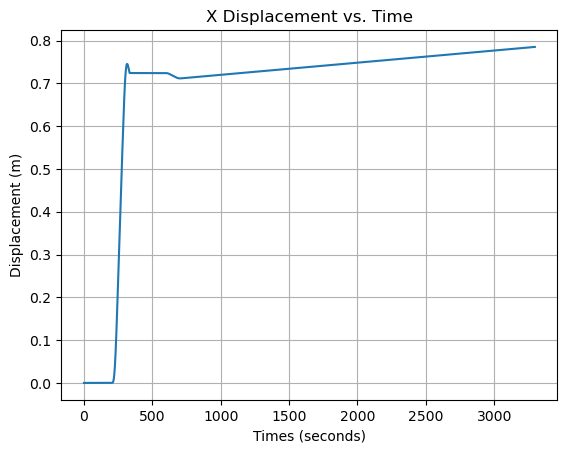

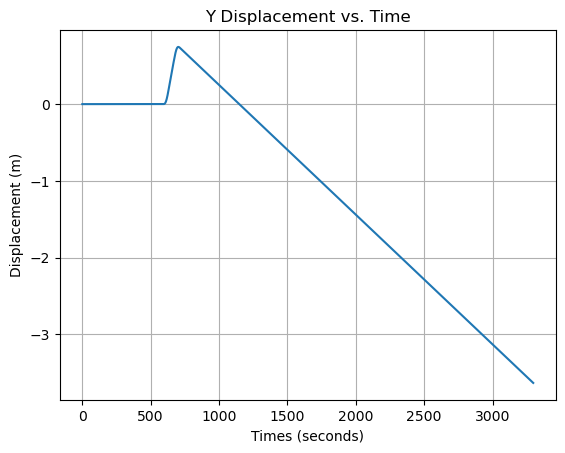

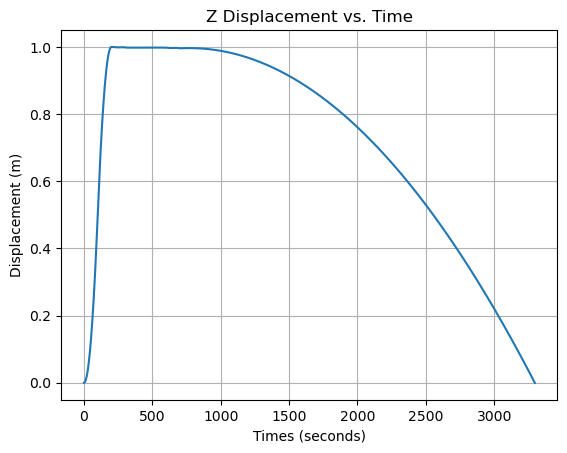

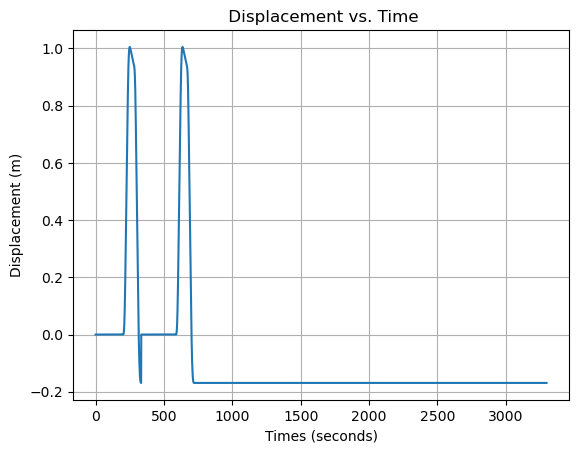

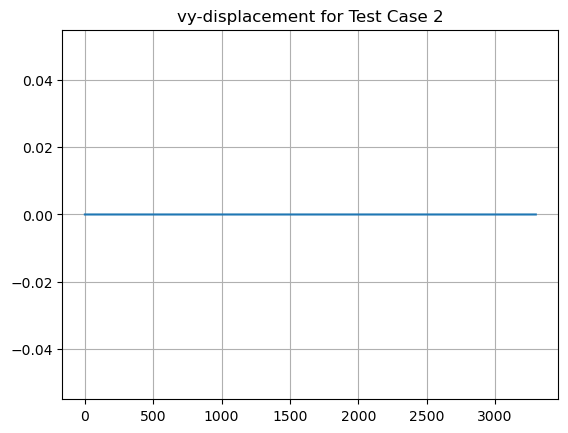

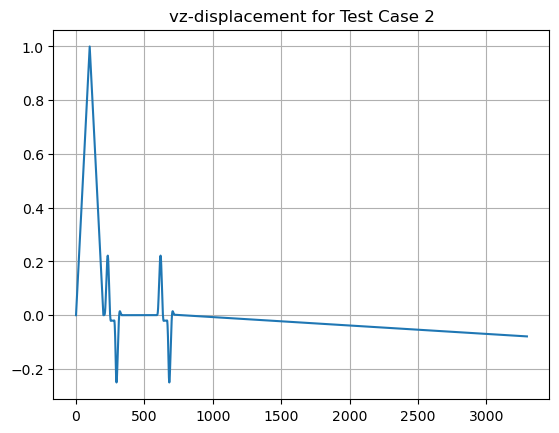

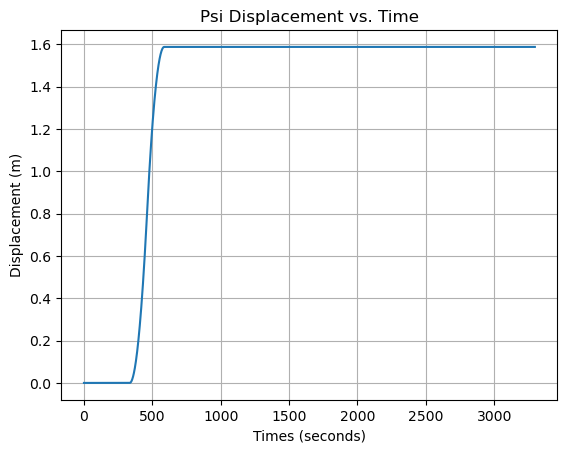

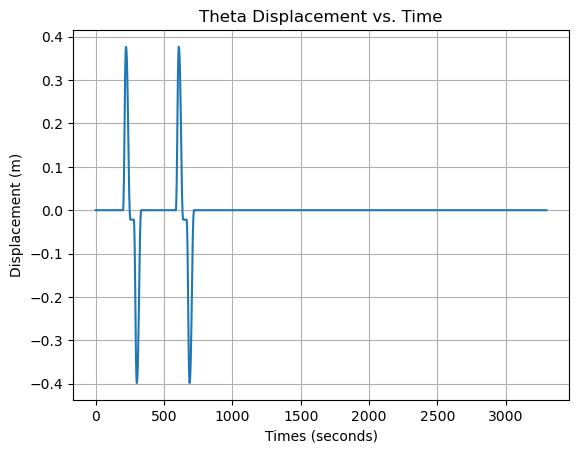

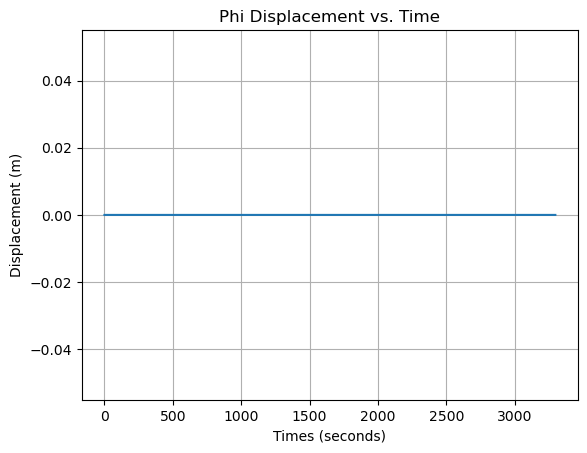

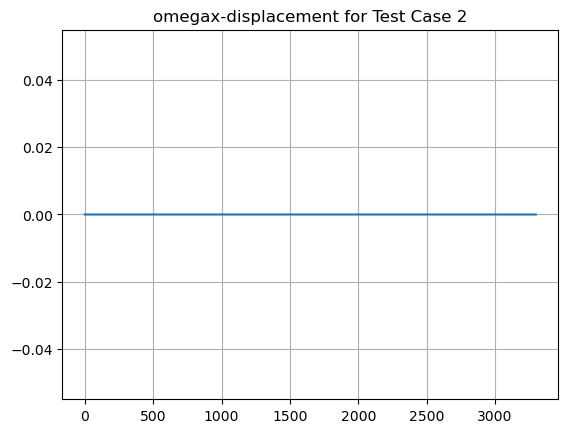

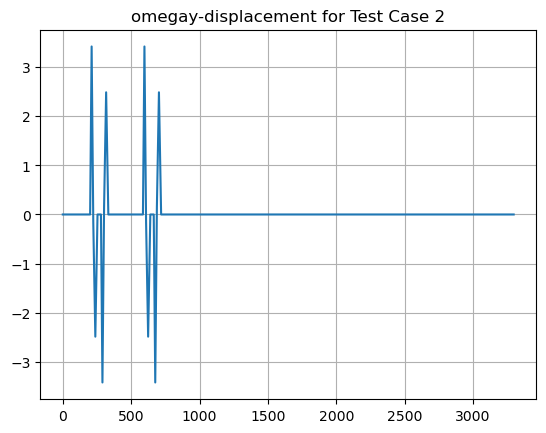

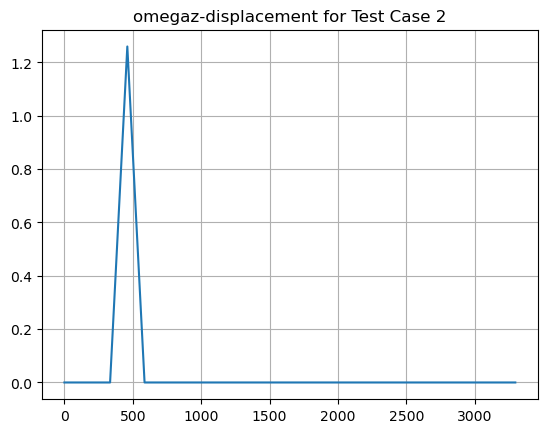

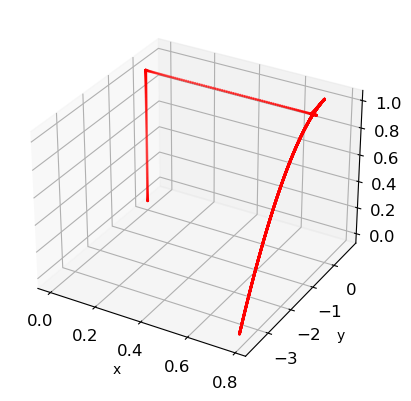

In [35]:
#Final Plot
EoM_complex1_history = np.array(EoM_complex1_history)
px_history = EoM_complex1_history[:,0]
py_history = EoM_complex1_history[:,1]
pz_history = EoM_complex1_history[:,2]


t_vals = np.linspace(0, 3297, 3297)

plt.plot(t_vals, px_history, label = "x-displacement")
plt.title("X Displacement vs. Time")
plt.xlabel("Times (seconds)")
plt.ylabel("Displacement (m)")
plt.grid()
plt.show()

plt.plot(t_vals, py_history, label = "y-displacement")
plt.title("Y Displacement vs. Time")
plt.xlabel("Times (seconds)")
plt.ylabel("Displacement (m)")
plt.grid()
plt.show()

plt.plot(t_vals, pz_history, label = "z-displacement")
plt.title("Z Displacement vs. Time")
plt.xlabel("Times (seconds)")
plt.ylabel("Displacement (m)")
plt.grid()
plt.show()

vx_history = EoM_complex1_history[:,6]
vy_history = EoM_complex1_history[:,7]
vz_history = EoM_complex1_history[:,8]


plt.plot(t_vals, vx_history, label = "vx-change")
plt.title(" Displacement vs. Time")
plt.xlabel("Times (seconds)")
plt.ylabel("Displacement (m)")
plt.grid()
plt.show()

plt.plot(t_vals, vy_history, label = "vy-change")
plt.title("vy-displacement for Test Case 2")
plt.grid()
plt.show()

plt.plot(t_vals, vz_history, label = "vz-change")
plt.title("vz-displacement for Test Case 2")
plt.grid()
plt.show()


psi_history = EoM_complex1_history[:,3]
theta_history = EoM_complex1_history[:,4]
phi_history = EoM_complex1_history[:,5]


plt.plot(t_vals, psi_history, label = "vx-change")
plt.title("Psi Displacement vs. Time")
plt.xlabel("Times (seconds)")
plt.ylabel("Displacement (m)")
plt.grid()
plt.show()

plt.plot(t_vals, theta_history, label = "vy-change")
plt.title("Theta Displacement vs. Time")
plt.xlabel("Times (seconds)")
plt.ylabel("Displacement (m)")
plt.grid()
plt.show()

plt.plot(t_vals, phi_history, label = "vz-change")
plt.title("Phi Displacement vs. Time")
plt.xlabel("Times (seconds)")
plt.ylabel("Displacement (m)")
plt.grid()
plt.show()


omegax_history = EoM_complex1_history[:,9]
omegay_history = EoM_complex1_history[:,10]
omegaz_history = EoM_complex1_history[:,11]


plt.plot(t_vals, omegax_history, label = "omegax-change")
plt.title("omegax-displacement for Test Case 2")
plt.grid()
plt.show()

plt.plot(t_vals, omegay_history, label = "omegay-change")
plt.title("omegay-displacement for Test Case 2")
plt.grid()
plt.show()

plt.plot(t_vals, omegaz_history, label = "omegaz-change")
plt.title("omegaz-displacement for Test Case 2")
plt.grid()
plt.show()

fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.plot3D(px_history, py_history, pz_history, linewidth=1, color='red') 
ax.scatter(px_history, py_history, pz_history, s=1, color='red', marker = 'o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.grid()
ax.tick_params(labelsize=12)